<a href="https://www.kaggle.com/code/oladelesteve/world-happiness-2019?scriptVersionId=120017347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**About the Dataset**

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotting in the notebook
%matplotlib inline

#Read the csv file
hap2019 = pd.read_csv('/kaggle/input/world-happiness-report/2015.csv')

In [2]:
#Let's observe the first few columns of the dataset
hap2019.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Before we move further, Lets observe the data types contained in each column so as to decide what column to use, change or drop.

In [3]:
hap2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we can see, the data type for each column is understandable. The column containing names are the object data types. But let's convert the Happiness Rank column to corellate with the others.

In [4]:
hap2019['Happiness Rank'] = hap2019['Happiness Rank'].astype(float)

In [5]:
hap2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.9+ KB


Now let's get the statisitcal information of each column.

In [6]:
hap2019.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Now lets count the number of countries represented by each region.

<AxesSubplot:>

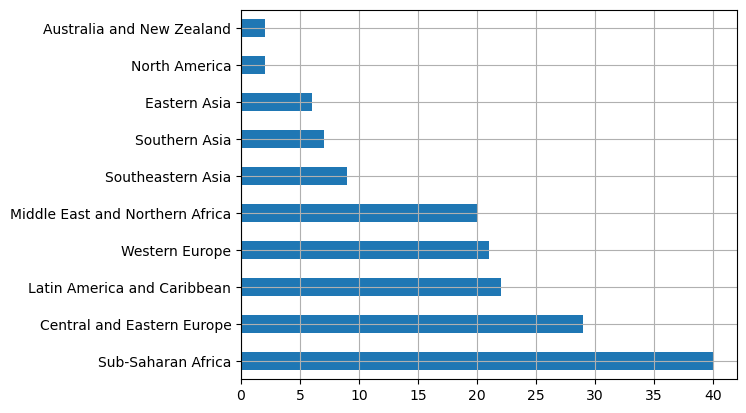

In [7]:
#counting the number of countries from each region.
hap2019['Region'].value_counts()

#plot the count for visualization.
hap2019['Region'].value_counts().plot(kind='barh', grid=True)

What are the top 5 happiest countries in the world?


In [8]:
#As there is a rank, it is easy very straigthforawrd getting the top 5 happiest country in the world.
#We use the head function as it brings the top 5
hap2019[['Country', 'Happiness Rank', 'Happiness Score']].head()

,Country,Happiness Rank,Happiness Score
0,Switzerland,1.0,7.587
1,Iceland,2.0,7.561
2,Denmark,3.0,7.527
3,Norway,4.0,7.522
4,Canada,5.0,7.427


There is a popular belief that when the general populace is happy, there will be high life expectancy. Let's test how true this is.

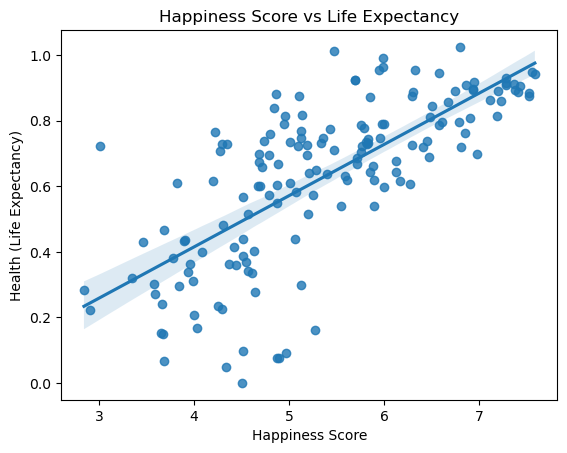

In [9]:
#Lets visualize the relationship between the happiness score and their life expectanacy
x = hap2019['Happiness Score']
y = hap2019['Health (Life Expectancy)']
sns.regplot(x= x,y= y)
plt.title('Happiness Score vs Life Expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.show()

So, The saying is quite true. As we can see here, there is a positive relationship between the happiness score and the life expectancy.
We can deduce that in a country where the happiness score is relatively high, the averagee life expectancy will be high also.

What is the correlation between GDP per capita and the happiness score?

<AxesSubplot:>

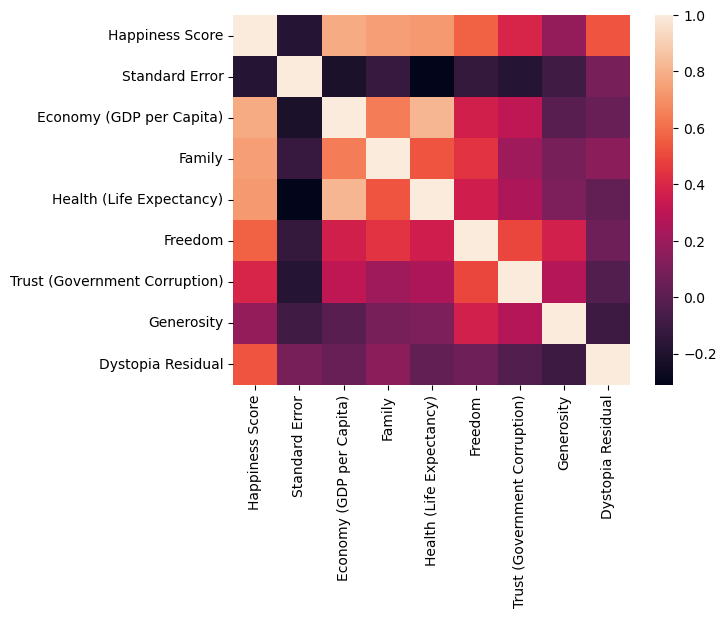

In [10]:
# we get the correlation matrix with numeric data, drop the Happiness Rank, Country and Region columns
corr = hap2019.drop(['Happiness Rank', 'Country', 'Region'], axis=1).corr()
corr

#plot the correlation matrix
sns.heatmap(corr)

From the correlation heatmap, we can observe that Economy (GDP per capita) has the most influence on the happiness score. Life Expectancy and Family is a close second.

 Do countries in certain regions tend to be happier or less happy than others?

In [11]:
#Get the correlation score between the GDP per capita and Happiness score
corr = hap2019['Economy (GDP per Capita)'].corr(hap2019['Happiness Score'])
print("Correlation between GDP per capita and happiness score:", corr)


Correlation between GDP per capita and happiness score: 0.7809655268660212


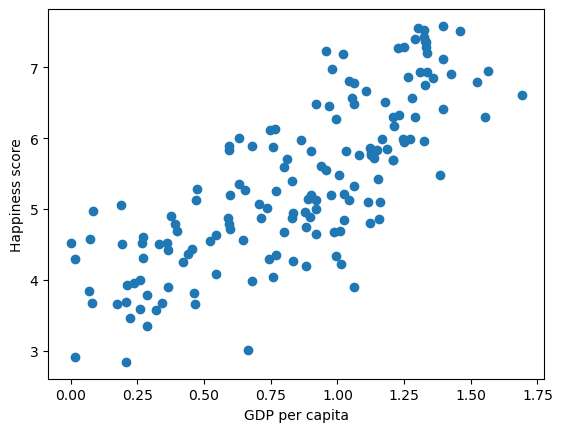

In [12]:
#visualiize the correlation using a scatter plot
plt.scatter(hap2019['Economy (GDP per Capita)'], hap2019['Happiness Score'])
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')
plt.show()


The correlation score showed a positive relationship and from the scatter plot above, we have visualized that relationship.

Now let's see how the freedom to make life choices affects how happy a country is.


In [13]:
#Get the correlation score between freedom and Happiness score
corr = hap2019['Freedom'].corr(hap2019['Happiness Score'])
print("Correlation between Freedom and happiness score:", corr)


Correlation between Freedom and happiness score: 0.568210904192518


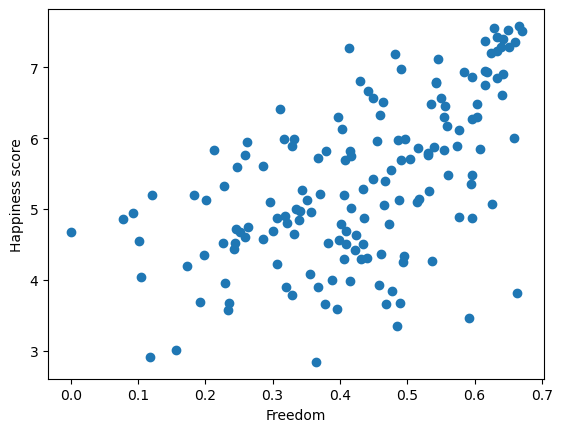

In [14]:
#visualiize the correlation using a scatter plot
plt.scatter(hap2019['Freedom'], hap2019['Happiness Score'])
plt.xlabel('Freedom')
plt.ylabel('Happiness score')
plt.show()


This plot shows us that there is realy no direct or concrete correlation between how much freedom a citizen has to make life decisions and how happy they are.

Are there any regional patterns in the data? Do countries in certain regions tend to be happier or less happy than others?

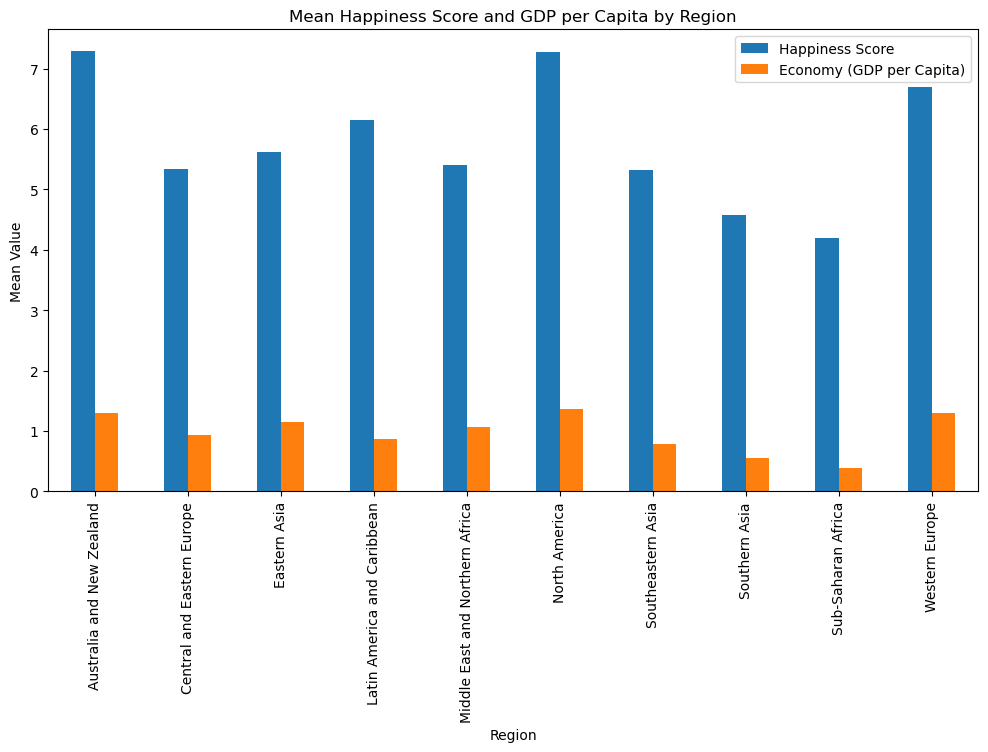

In [15]:
#first we group the data by region and find the mean
grouped_data = hap2019.groupby('Region')[['Happiness Score', 'Economy (GDP per Capita)']].mean()

# plot the mean happiness score and GDP per capita for each region
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Happiness Score and GDP per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.show()

Sub-Saharan Africa has the lowest GDP per capita and consequently the lowest happiness score. We can determine that people from sub saharan Africa are the least happiest in the world while North America, Australia and New Zealand has the happiest people.

 Is there a significant relationship between the government corruption levels and happiness score of each country?
 

In [16]:
#Get the correlation score between the GDP per capita and Happiness score
corr = hap2019['Trust (Government Corruption)'].corr(hap2019['Happiness Score'])
print("Correlation between Government corruption and happiness score:", corr)


Correlation between Government corruption and happiness score: 0.395198583836911


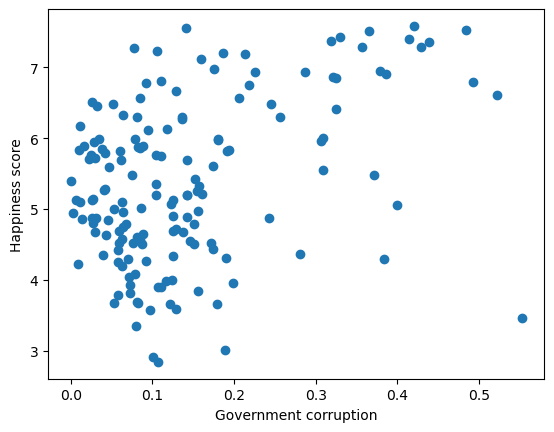

In [17]:
#visualiize the correlation using a scatter plot
plt.scatter(hap2019['Trust (Government Corruption)'], hap2019['Happiness Score'])
plt.xlabel('Government corruption')
plt.ylabel('Happiness score')
plt.show()

This shows that there is hardly any correlation between how corrupt the government of a country is and the happiness of its people